# Incremental least squares regression using LOOCV

## Using LOOCV on incremental LSE using LOOCV - without Dynamic/Recursive Programming

Number of Avg MSEs: 27
Best model for LOOCV is 4-degree polynomial
MSE for 4-degree polynomial is 65573


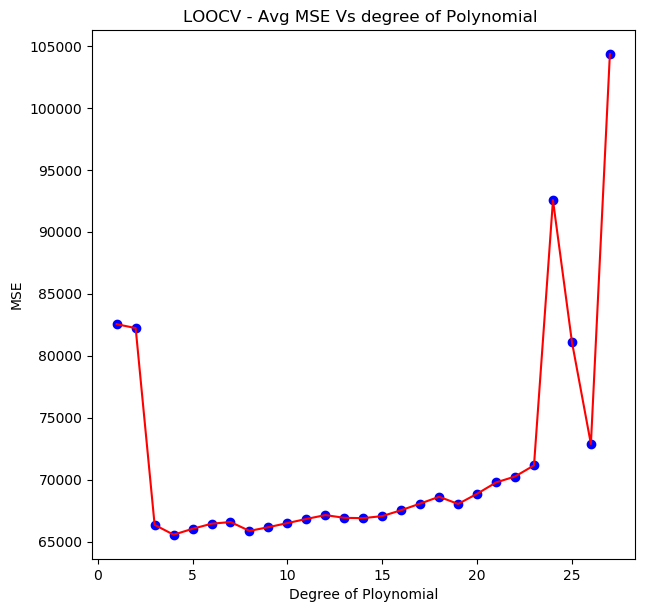

In [2]:
'''
@author - Amith Kumar Singh
'''
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA

# Accessing file and converting to numeric
file = open("hw2.dat","r");
data = file.readlines()
x, y, deg_wise_mse_list = [], [], []

for line in data:
    values = line.split()
    x.append(float(values[0])), y.append(float(values[1]))

xx1 = np.asarray(x) # Convert list to arrays
yy1 = np.asarray(y)

l_xy = len(xx1)

for a in range(1,28): 
    mse_list, Avg = [], 0
    
    for i in range(0,l_xy):   # Loop over each of test train split and calculate MSE of a given model
        
        # ********** Test Train split starts here for LOOCV **********
        a1 = xx1[i+1:]                             
        b1 = xx1[:i]
        X_test = [xx1[i]]
        X_train = np.concatenate((b1, a1), axis=0)

        a2 = yy1[i+1:]
        b2 = yy1[:i]
        y_test = [yy1[i]]
        y_train = np.concatenate((b2, a2), axis=0) 
        # ********** Test Train split Ends **********
        
        N = a+1               # a = deg of polynomial. Looping from 1 to 27
        X = np.vander(X_train,N)    # Vandermonde Matrix
        X_ = np.vander(X_test,N)

        # Computation part to find the coef matrix using 'Normal Equation'
        X_prod = np.matmul(X.T,X)
        inverse = np.linalg.inv(X_prod)
        Y_prod = np.matmul(X.T,y_train)

        coef_matrix = np.matmul(inverse, Y_prod)
        #print("Coefficent or Parameters are: \n" + str(coef_matrix))

        y_pred = np.matmul(X_, coef_matrix)

        # Calculate Errors - MSE and append to list to find avg MSE for a given model
        mse=np.mean((y_test-y_pred)**2)
        mse_list.append(mse)

    #print(len(mse_list))
    Avg = np.average(mse_list) 
    #print(Avg)
    deg_wise_mse_list.append(Avg) # List of all Avg MSEs - 27s Avg MSEs, one for each model
    
print("Number of Avg MSEs: "+ str(len(deg_wise_mse_list)))

best_ = np.argmin(deg_wise_mse_list) # model with minimum MSE for LOOCV
best_model = best_ + 1

print("Best model for LOOCV is %s-degree polynomial" %best_model)
print("MSE for %s-degree polynomial is %d" % (best_model, deg_wise_mse_list[best_]))

x_plot = np.arange(1,28)
plt.figure(num=None, figsize=(7, 7), dpi=100, facecolor='w', edgecolor='k')
plt.title("LOOCV - Avg MSE Vs degree of Polynomial ") 
plt.xlabel("Degree of Ploynomial") 
plt.ylabel("MSE") 
plt.plot(x_plot,deg_wise_mse_list, 'bo')
plt.plot(x_plot,deg_wise_mse_list, 'r-')
plt.show()


## Using LOOCV on incremental LSE using LOOCV - with Dynamic/Recursive Programming

## 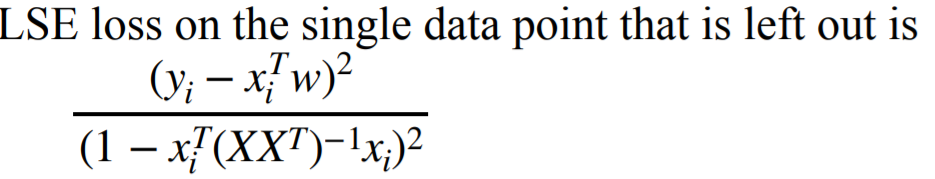

Number of Avg LSEs: 27
Best model for LOOCV is 4-degree polynomial
LSE Loss for 4-degree polynomial is 65573


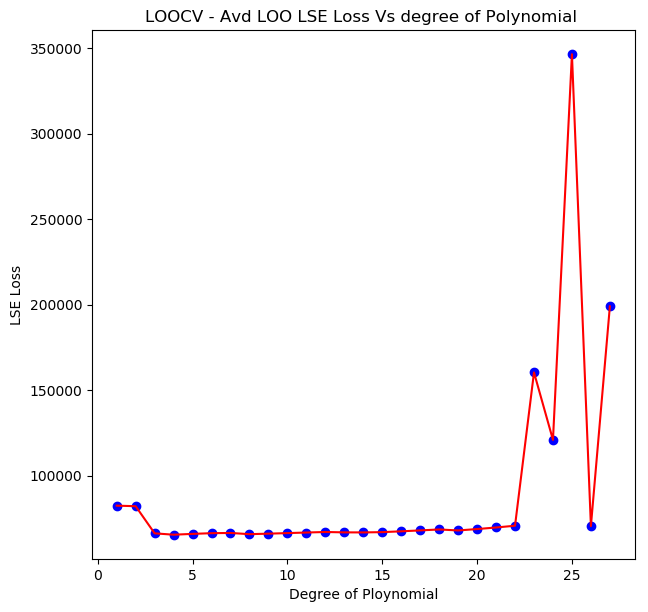

In [49]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA

# Accessing file and converting to numeric
file = open("hw2.dat","r");
data = file.readlines()
x, y, deg_wise_mse_list = [], [], []

for line in data:
    values = line.split()
    x.append(float(values[0])), y.append(float(values[1]))

xx1 = np.asarray(x) # Convert list to arrays
yy1 = np.asarray(y)

l_xy = len(xx1)

for a in range(1,28): 
    mse_list, Avg = [], 0
    
    N = a+1               # a = deg of polynomial. Looping from 1 to 27
    X = np.vander(xx1,N)    # Vandermonde Matrix
    
    # Computation part to find the coef matrix using 'Normal Equation'
    X_prod = np.matmul(X.T,X)
    inverse = np.linalg.inv(X_prod)
    Y_prod = np.matmul(X.T,yy1)

    w = np.matmul(inverse, Y_prod)  # This 'w' will remain unchanged for a given degree.
    
    for i in range(0,l_xy):   # Loop over each of test train split and calculate MSE of a given model
        
        # ********** Test Train split starts here for LOOCV **********
        a1 = xx1[i+1:]                             
        b1 = xx1[:i]
        X_test = [xx1[i]]
        X_train = np.concatenate((b1, a1), axis=0)

        a2 = yy1[i+1:]
        b2 = yy1[:i]
        y_test = [yy1[i]]
        y_train = np.concatenate((b2, a2), axis=0) 
        # ********** Test Train split Ends **********
       
        # Implementing Formula to calculate the LSE loss under incremental LOOCV
        X_ = np.vander(X_test,N)

        nume = (y_test - np.matmul(X_,w.T))**2
        
        deno1 = np.matmul(X_,inverse.T)
        deno2 = np.matmul(deno1,X_.T)
        deno = (1-deno2)**2
        
        lse_loss = nume/deno;
        
        mse_list.append(lse_loss)
    
    Avg = np.average(mse_list)
    deg_wise_mse_list.append(Avg) # List of all Avg MSEs - 27s Avg MSEs, one for each model
    
print("Number of Avg LSEs: "+ str(len(deg_wise_mse_list)))

best_ = np.argmin(deg_wise_mse_list) # model with minimum MSE for LOOCV
best_model = best_ + 1

print("Best model for LOOCV is %s-degree polynomial" %best_model)
print("LSE Loss for %s-degree polynomial is %d" % (best_model, deg_wise_mse_list[best_]))


x_plot = np.arange(1,28)
plt.figure(num=None, figsize=(7, 7), dpi=100, facecolor='w', edgecolor='k')
plt.title("LOOCV - Avd LOO LSE Loss Vs degree of Polynomial ") 
plt.xlabel("Degree of Ploynomial") 
plt.ylabel("LSE Loss") 
plt.plot(x_plot,deg_wise_mse_list, 'bo')
plt.plot(x_plot,deg_wise_mse_list, 'r-')
plt.show()
